# Object Detection with Pytorch

In [1]:
# Reference Link for list of models: https://pytorch.org/vision/stable/models.html
# https://pytorch.org/vision/stable/models.html#object-detection

## Using: fasterrcnn_resnet50_fpn

In [ ]:
import torchvision
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import torch

# Load image
# img_path = "cdog.jpg"
img_path = "traffic.webb"
img = Image.open(img_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension


FileNotFoundError: [Errno 2] No such file or directory: '/Users/oysterable/delete/adl_computer_vision/ObjectDetectionPytorch/traffic.webb'

The following Object Detection models are available, with or without pre-trained weights:

- Faster R-CNN
- FCOS
- RetinaNet
- SSD
- SSDlite

Instance Segmentation:

- Mask R-CNN (https://arxiv.org/pdf/1703.06870)


In [ ]:
# # List available models
# all_models = list_models()
# classification_models = list_models(module=torchvision.models)
# print("Pytorch models: ",classification_models)



NameError: name 'list_models' is not defined

In [ ]:

# Load model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Run prediction
with torch.no_grad():
    outputs = model(img_tensor)

# Show top detections
for idx, (box, label, score) in enumerate(zip(outputs[0]['boxes'], outputs[0]['labels'], outputs[0]['scores'])):
    if score > 0.5:
        print(f"Detected: {label.item()}, Confidence: {score.item():.2f}, Box: {box.tolist()}")


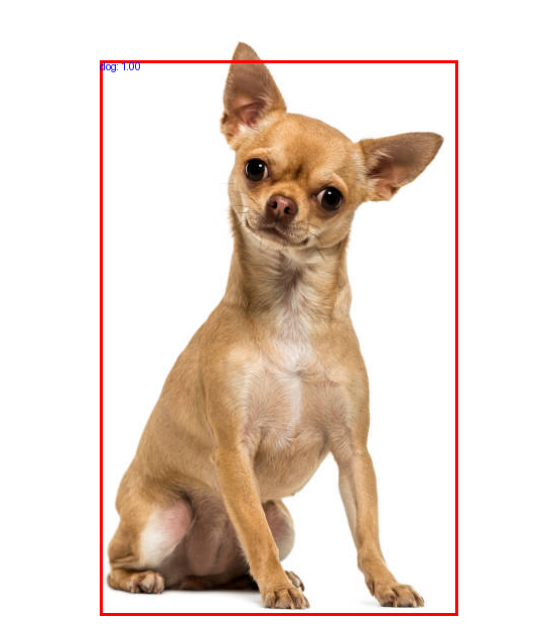

In [ ]:
import torchvision
import torchvision.transforms as T
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import torch

# Load image
img_path = "cdog.jpg"
img = Image.open(img_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
img_tensor = transform(img).unsqueeze(0)

# Load model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Run prediction
with torch.no_grad():
    outputs = model(img_tensor)

# Map label IDs to COCO class names (91 classes in COCO dataset)
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella',
    'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
    'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Draw boxes on the image
draw = ImageDraw.Draw(img)
font = ImageFont.load_default()

for box, label, score in zip(outputs[0]['boxes'], outputs[0]['labels'], outputs[0]['scores']):
    if score > 0.5:
        x1, y1, x2, y2 = box.tolist()
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
        label_text = f"{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}"
        draw.text((x1, y1), label_text, fill="blue", font=font)

# Display the image with boxes
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.show()


## Using YOLO

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


image 1/1 /content/cdog.jpg: 640x576 1 dog, 434.5ms
Speed: 3.6ms preprocess, 434.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


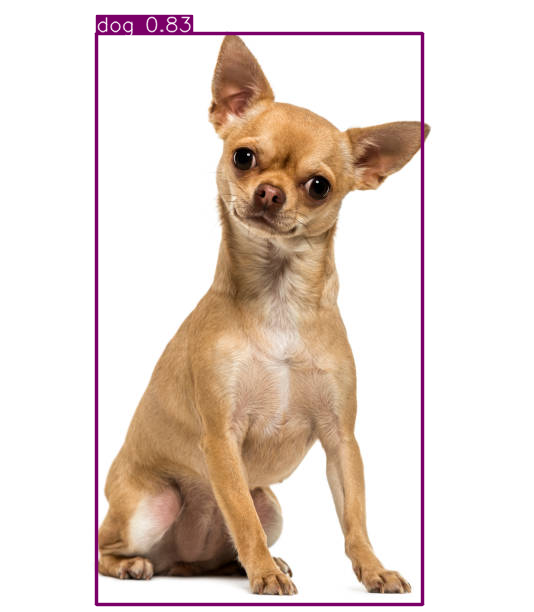

In [ ]:
from ultralytics import YOLO

# Load pretrained model
model = YOLO('yolov5s.pt')  # Options: yolov5n, yolov5s, yolov5m, yolov5l, yolov5x

# Predict on an image
results = model('cdog.jpg')[0]

# Show results
results.show()

